# Data Loading

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings. filterwarnings ('ignore')

pd.set_option('display.max_columns', None)

# Data Cleaning

In [2]:
df_movies = pd.read_csv('data/big_movies.csv')
df_ratings = pd.read_csv('data/big_ratings.csv')

In [3]:
# Renaming columns

df_movies.rename(columns={'movieId': 'movie_id'}, inplace=True)
df_ratings.rename(columns={'movieId': 'movie_id', 'userId': 'User_ID'}, inplace=True)

In [4]:
df_movies

,genres,keywords,title,overview,production_countries,year,cast,movie_id
0,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...",Avatar,"In the 22nd century, a paraplegic Marine is di...","United States of America, United Kingdom",2009,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",72998
1,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",United States of America,2007,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",53125
2,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6...",Spectre,A cryptic message from Bond’s past sends him o...,"United Kingdom, United States of America",2015,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",136020
3,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,...",John Carter,"John Carter is a war-weary, former military ca...",United States of America,2012,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",93363
4,"Fantasy, Action, Adventure","dual identity, amnesia, sandstorm, love of one...",Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,United States of America,2007,"Tobey Maguire, Kirsten Dunst, James Franco, Th...",52722
...,...,...,...,...,...,...,...,...
3292,Drama,"gang, audition, police fake, homeless, actress",Bang,A young woman in L.A. is having a bad day: she...,United States of America,1995,"Darling Narita, Peter Greene, Michael Newland,...",1697
3293,"Science Fiction, Drama, Thriller","distrust, garage, identity crisis, time travel...",Primer,Friends/fledgling entrepreneurs invent a devic...,United States of America,2004,"Shane Carruth, David Sullivan, Casey Gooden, A...",8914
3294,"Comedy, Romance",NaN,Newlyweds,A newlywed couple's honeymoon is upended by th...,NaN,2011,"Edward Burns, Kerry Bishé, Marsha Dietlein, Ca...",91829
3295,"Comedy, Drama, Romance, TV Movie","date, love at first sight, narration, investig...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",United States of America,2013,"Eric Mabius, Kristin Booth, Crystal Lowe, Geof...",164791


In [5]:
df_ratings

,User_ID,movie_id,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [6]:
# Checking Duplicate Entries

print(df_movies.duplicated().sum())
print(df_ratings.duplicated().sum())

0
0


In [7]:
# Dropping Duplicate Entries

df_movies = df_movies.drop_duplicates()
df_ratings = df_ratings.drop_duplicates()

In [8]:
# Creating list to store movie ids with no genre

dropped_movie_ids = df_movies[df_movies['genres'].isna()]['movie_id'].tolist()

In [9]:
# Removing dropped movies in ratings dataframe

df_ratings = df_ratings[~df_ratings['movie_id'].isin(dropped_movie_ids)]

In [10]:
# Checking Missing Values

df_movies.isna().sum()

genres                   10
keywords                245
title                     0
overview                  0
production_countries     86
year                      0
cast                     15
movie_id                  0
dtype: int64

In [11]:
df_ratings.isna().sum()

User_ID      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [12]:
# removing rows with less missing values

df_movies = df_movies.loc[~df_movies['keywords'].isnull()]
df_movies = df_movies.loc[~df_movies['cast'].isnull()]
df_movies = df_movies.loc[~df_movies['genres'].isnull()]

# filling na values in production_countries column with its mode

df_movies['production_countries'].fillna(df_movies['production_countries'].mode()[0], inplace=True)

In [13]:
# Final check for missing values

df_movies.isna().sum()

genres                  0
keywords                0
title                   0
overview                0
production_countries    0
year                    0
cast                    0
movie_id                0
dtype: int64

In [14]:
# resetting the index

df_movies = df_movies.reset_index(drop=True)

# Data Preparation for Collaborative Filtering

In [15]:
# Extract unique movie_ids from df_ratings
unique_ids = df_ratings['movie_id'].unique()

# Filter df_movies to include only the movies present in df_ratings
df_movies = df_movies[df_movies['movie_id'].isin(unique_ids)]

df_ratings = df_ratings[df_ratings['movie_id'].isin(df_movies['movie_id'])]

In [16]:
# Adding title in ratings dataframe

df_ratings = pd.merge(df_ratings, df_movies[['title', 'movie_id']], on='movie_id')

In [17]:
# Normalizing the reviews

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the ratings column
df_ratings['normalized_ratings'] = scaler.fit_transform(df_ratings[['rating']])

In [18]:
# Convert to interaction matrix
interaction_matrix = df_ratings.pivot_table(index='User_ID', columns='movie_id', values='normalized_ratings')

# Fill NaN values with 0 (optional)
interaction_matrix = interaction_matrix.fillna(0)

# Display the interaction matrix
interaction_matrix

movie_id    1       10      14      15      16        17      18      \
User_ID                                                                
1         0.000000     0.0     0.0     0.0     0.0  0.000000     0.0   
2        -0.025836     0.0     0.0     0.0     0.0  0.000000     0.0   
3         0.448411     0.0     0.0     0.0     0.0  0.000000     0.0   
4        -0.500083     0.0     0.0     0.0     0.0  0.000000     0.0   
5         0.448411     0.0     0.0     0.0     0.0  0.000000     0.0   
...            ...     ...     ...     ...     ...       ...     ...   
162537    0.000000     0.0     0.0     0.0     0.0  0.000000     0.0   
162538   -1.448578     0.0     0.0     0.0     0.0  0.448411     0.0   
162539    0.000000     0.0     0.0     0.0     0.0  0.000000     0.0   
162540    0.000000     0.0     0.0     0.0     0.0  0.000000     0.0   
162541    0.000000     0.0     0.0     0.0     0.0  0.000000     0.0   

movie_id    19      20      21      22      23      25      34        36      \
User_ID                                                                        
1         0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
2         0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
3         0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
4         0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
5         0.448411     0.0     0.0     0.0     0.0     0.0     0.0  1.396905   
...            ...     ...     ...     ...     ...     ...     ...       ...   
162537    0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
162538    0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
162539    0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
162540    0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
162541    0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   

movie_id    39      41      44      45        48      57      61      \
User_ID                                                                
1         0.000000     0.0     0.0     0.0  0.000000     0.0     0.0   
2         0.000000     0.0     0.0     0.0  0.000000     0.0     0.0   
3         0.000000     0.0     0.0     0.0  0.000000     0.0     0.0   
4         0.000000     0.0     0.0     0.0  0.000000     0.0     0.0   
5        -1.448578     0.0     0.0     0.0  0.000000     0.0     0.0   
...            ...     ...     ...     ...       ...     ...     ...   
162537    0.000000     0.0     0.0     0.0 -0.500083     0.0     0.0   
162538    0.448411     0.0     0.0     0.0  0.922658     0.0     0.0   
162539    0.000000     0.0     0.0     0.0  0.000000     0.0     0.0   
162540    0.000000     0.0     0.0     0.0  0.000000     0.0     0.0   
162541    0.000000     0.0     0.0     0.0  0.000000     0.0     0.0   

movie_id    62      69      70      81      86      92      93        95      \
User_ID                                                                        
1         0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
2        -2.871319     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
3         0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
4         0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
5         0.000000     0.0     0.0     0.0     0.0     0.0     0.0 -0.500083   
...            ...     ...     ...     ...     ...     ...     ...       ...   
162537    0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
162538    0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
162539    0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
162540    0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   
162541    0.000000     0.0     0.0     0.0     0.0     0.0     0.0  0.000000   

movie_id  100     101       104       110   

# Collaborative Filtering

In [19]:
!pip install fuzzywuzzy

In [20]:
from sklearn.decomposition import TruncatedSVD
from fuzzywuzzy import process

In [21]:
def collaborative_recommend(movie_name, matrix, df, n_recs):

    # Fit the SVD model on the transposed interaction matrix
    svd_model = TruncatedSVD(n_components=50)
    svd_matrix = svd_model.fit_transform(matrix.T)

    # Extract input movie ID
    movie_id = df_movies[df_movies['title'] == movie_name].index[0]

    # Check if the movie_id is valid
    if movie_id >= len(svd_matrix):
        raise ValueError(f"Movie ID {movie_id} is out of range for the SVD matrix.")

    # Calculate similarity scores
    movie_vector = svd_matrix[movie_id]
    similarities = svd_matrix.dot(movie_vector)

    # Get the indices of the most similar movies
    similar_movie_ids = similarities.argsort()[::-1][1:n_recs+1]

    # List to store recommendations
    recs = []
    for i in similar_movie_ids:
        recs.append({'Title': df['title'][i], 'Similarity': similarities[i]})

    return recs

# Data Preparation for Content-Based Filtering

In [22]:
# Creating a 'tags' column by concatenating 'listed_in', 'country', and 'rating'
df_movies['tags'] = df_movies['genres'] + ' ' + df_movies['keywords'] + ' ' + df_movies['overview'] + ' ' + df_movies['production_countries'] + ' ' + df_movies['cast']

# Removing unwanted symbols from the 'tags' column
df_movies['tags'] = df_movies['tags'].apply(lambda x: x.replace(".",""))
df_movies['tags'] = df_movies['tags'].apply(lambda x: x.replace(",",""))
df_movies['tags'] = df_movies['tags'].apply(lambda x: x.replace(" &",""))

df_movies['tags'] = df_movies['tags'].str.lower()

# Keeping only the 'title' and 'tags' columns for further processing
df_movies = df_movies[['title', 'tags']]

In [23]:
# Displaying tags column value(format)

full_content = df_movies[df_movies['title'] == 'Spider-Man 2']['tags'].values[0]
print(full_content)

action adventure fantasy dual identity love of one's life pizza boy marvel comic sequel superhero doctor scientist tentacle death super villain peter parker is going through a major identity crisis burned out from being spider-man he decides to shelve his superhero alter ego which leaves the city suffering in the wake of carnage left by the evil doc ock in the meantime parker still can't act on his feelings for mary jane watson a girl he's loved since childhood united states of america tobey maguire kirsten dunst james franco alfred molina rosemary harris donna murphy jk simmons daniel gillies dylan baker willem dafoe mageina tovah bruce campbell stan lee scott spiegel joel mchale hal sparks donnell rawlings emily deschanel elizabeth banks daniel dae kim aasif mandvi joey diaz vanessa ferlito joy bryant john landis phil lamarr gregg edelman ted raimi cliff robertson elya baskin bill nunn brent briscoe christine estabrook john paxton joanne baron peter mcrobbie louis lombardi marc john 

# Content-Based Filtering

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
# Initializing TfidfVectorizer

tfidf = TfidfVectorizer(max_features=8000, stop_words='english')

In [26]:
# Converting the 'tags' column into a matrix of token counts (vectorization)

vectors = tfidf.fit_transform(df_movies['tags']).toarray()

In [27]:
# Calculating cosine similarity between the vectors

similarity = cosine_similarity(vectors)

In [28]:
# This function takes a movie title as input and recommends the most similar movies based on cosine similarity of their tags.

def content_based_recommend(title, n_recs):

    # Extract input movie ID
    movie_id = df_movies[df_movies['title'] == title].index[0]

    # Calculating cosine similarity with other movies
    distances = similarity[movie_id]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:n_recs+1]

    # Construct the list of recommended movie titles
    recs = [{'Title': df_movies.iloc[i[0]].title, 'Similarity': i[1]} for i in movies_list]

    return recs

# Collaboration and Content-Based Filtering Combined

In [29]:
def get_similar_title(title):
    # Extracting the index of similar title to the input title
    movie_id = process.extractOne(title, df_movies['title'])[2]

    movie_title = df_movies.loc[movie_id]['title']

    return movie_id, movie_title

In [30]:
# Functions to scale the similarity scores after recommendation

def min_max_scaling(recommendations):
    min_score = min([rec['Similarity'] for rec in recommendations])
    max_score = max([rec['Similarity'] for rec in recommendations])
    scaled_recommendations = []

    for rec in recommendations:
        scaled_score = (rec['Similarity'] - min_score) / (max_score - min_score)
        scaled_recommendations.append({'Title': rec['Title'], 'Similarity': scaled_score})

    return scaled_recommendations

def scale_to_range(recommendations, new_min=0, new_max=1):
    min_score = min([rec['Similarity'] for rec in recommendations])
    max_score = max([rec['Similarity'] for rec in recommendations])
    scaled_recommendations = []

    for rec in recommendations:
        scaled_score = ((rec['Similarity'] - min_score) / (max_score - min_score)) * (new_max - new_min) + new_min
        scaled_recommendations.append({'Title': rec['Title'], 'Similarity': scaled_score})

    return scaled_recommendations

In [43]:
# Function combining collaboration and content based filtering

def hybrid_recommendation(title, n_recs, weight_collab=0.4, weight_content=0.6):

    movie_id , movie_title = get_similar_title(title)
    content_based_recommendation = content_based_recommend(movie_title, n_recs)
    collaborative_recommendation = collaborative_recommend(movie_title, interaction_matrix, df_movies, n_recs)
    
    # Scaling the recommendations similarity scores
    scaled_collab_recommendations = scale_to_range(collaborative_recommendation, new_min=0, new_max=1)
    scaled_content_recommendations = min_max_scaling(content_based_recommendation)
    
    # Combine the recommendations
    hybrid_scores = {}
    
    for collab_rec in scaled_collab_recommendations:
        title = collab_rec['Title']
        score = collab_rec['Similarity']
        hybrid_scores[title] = weight_collab * score
    
    for content_rec in scaled_content_recommendations:
        title = content_rec['Title']
        score = content_rec['Similarity']
        if title in hybrid_scores:
            hybrid_scores[title] += weight_content * score
        else:
            hybrid_scores[title] = weight_content * score
    
    # Sort the hybrid scores to get the top recommendations
    sorted_hybrid_scores = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)[:n_recs]
    
    # Convert to list of dictionaries for the final recommendation
    final_recommendations = [{'Title': title, 'Similarity': score} for title, score in sorted_hybrid_scores]
    
    return final_recommendations

# Prediction (Usage)

In [32]:
# Getting the similar title from input

_, title = get_similar_title('ironman')

In [33]:
# Content based & Collaborative recommendation

collab_recommendations = collaborative_recommend(title, interaction_matrix, df_movies, 5)
content_recommendations = content_based_recommend(title, 5)

In [34]:
scale_to_range(collab_recommendations, new_min=0, new_max=1)

[{'Title': 'Pacific Rim', 'Similarity': 1.0},
 {'Title': 'Little Nicky', 'Similarity': 0.7579429152711208},
 {'Title': 'Independence Day: Resurgence', 'Similarity': 0.07477319742795506},
 {'Title': 'Terminator Genisys', 'Similarity': 0.061282710040390376},
 {'Title': 'Indiana Jones and the Kingdom of the Crystal Skull',
  'Similarity': 0.0}]

In [35]:
min_max_scaling(content_recommendations)

[{'Title': 'Iron Man 2', 'Similarity': 1.0},
 {'Title': 'Iron Man 3', 'Similarity': 0.9699620422264069},
 {'Title': 'Avengers: Age of Ultron', 'Similarity': 0.22673015710082747},
 {'Title': 'Thor: The Dark World', 'Similarity': 0.029878101996657816},
 {'Title': 'Captain America: Civil War', 'Similarity': 0.0}]

In [44]:
# Hybrid recommendation usage

hybrid_recommendations = hybrid_recommendation(title, 5)

for each in hybrid_recommendations:
  print(each)

{'Title': 'Iron Man 2', 'Similarity': 0.6}
{'Title': 'Iron Man 3', 'Similarity': 0.5819772253358442}
{'Title': 'Pacific Rim', 'Similarity': 0.4}
{'Title': 'Avengers: Age of Ultron', 'Similarity': 0.13603809426049648}
{'Title': 'Terminator Genisys', 'Similarity': 0.12034243263728184}


In [56]:
def display_recommendations_with_chart(recommendations):
    # Convert recommendations to DataFrame for easier plotting
    df_recommendations = pd.DataFrame(recommendations)
    
    # Bar Chart for Similarity Scores
    print("Movie Recommendations")
    fig, ax = plt.subplots()
    sns.barplot(x='Similarity', y='Title', data=df_recommendations, ax=ax, palette="viridis")
    ax.set_xticklabels([])
    ax.set_xlabel("Similarity")
    ax.set_ylabel("Movie Title")
    plt.show()

Movie Recommendations


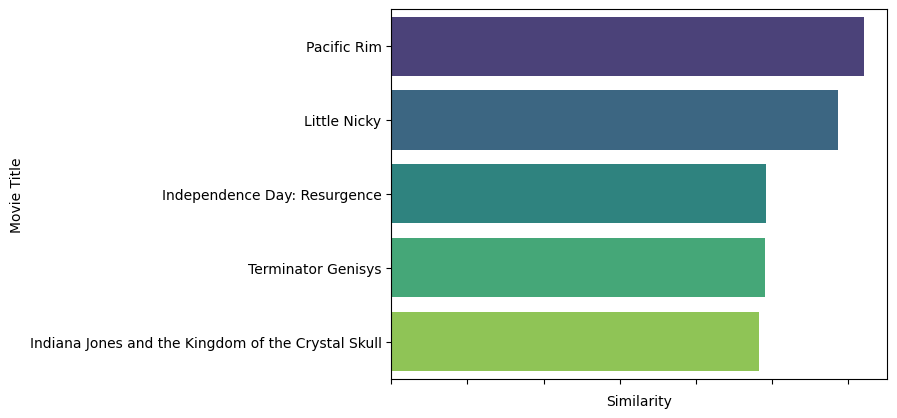

In [57]:
display_recommendations_with_chart(collab_recommendations)

In [37]:
raise ValueError

ValueError: 

# Neural Collaborative Filtering

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout

In [ ]:
# Map user and item IDs to a continuous range of indices
user_mapping = {user_id: idx for idx, user_id in enumerate(df_ratings['User_ID'].unique())}

# Apply the mapping
df_ratings['User_ID'] = df_ratings['User_ID'].map(user_mapping)

In [ ]:
# Train-test split
train, test = train_test_split(df_ratings, test_size=0.2, random_state=42)

In [ ]:
# Define model parameters
num_users = df_ratings['User_ID'].nunique()
num_movies = df_ratings['movie_id'].nunique()
embedding_size = 50

# Input layers
user_input = Input(shape=(1,), name='user_input')
movie_input = Input(shape=(1,), name='movie_input')

# Embedding layers
user_embedding = Embedding(input_dim=num_users + 1, output_dim=embedding_size, name='user_embedding')(user_input)
movie_embedding = Embedding(input_dim=num_movies + 1, output_dim=embedding_size, name='movie_embedding')(movie_input)

# Flatten embeddings
user_vec = Flatten(name='user_flatten')(user_embedding)
movie_vec = Flatten(name='item_flatten')(movie_embedding)

# Concatenate user and item vectors
concat = Concatenate()([user_vec, movie_vec])

# Add dense layers
dense_1 = Dense(128, activation='relu')(concat)
dropout_1 = Dropout(0.5)(dense_1)
dense_2 = Dense(64, activation='relu')(dropout_1)

# Output layer (regression for ratings)
output = Dense(1, activation='linear')(dense_2)

# Create and compile the model
ncf_model = Model([user_input, movie_input], output)
ncf_model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
ncf_model.summary()

In [ ]:
train_user_data = train['User_ID'].values
train_item_data = train['movie_id'].values
train_labels = train['rating'].values

test_user_data = test['User_ID'].values
test_item_data = test['movie_id'].values
test_labels = test['rating'].values

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
ncf_model.fit(
    [train_user_data, train_item_data],
    train_labels,
    batch_size=64,
    epochs=10,
    verbose=1,
    validation_data=([test_user_data, test_item_data], test_labels),
    callbacks=[early_stopping]
)

In [ ]:
# Example prediction

def prediction(user_id, movie_id):
  predicted_rating = ncf_model.predict([np.array([user_id]), np.array([movie_id])])
  print(f'Predicted rating for user {user_id} on item {movie_id} is {predicted_rating[0][0]:.2f}')

user_id = 1
movie_id = 25

prediction(user_id, movie_id)

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = ncf_model.predict([test_user_data, test_item_data])
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
print(f'Root Mean Squared Error: {rmse:.4f}')
